In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from datetime import date
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from scipy import stats
import utility
from scipy import stats

In [2]:
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_validate
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score, make_scorer

# def cus_scoring(y_pred, y_act):
#     score=stats.pearsonr(y_pred, y_act)[0]
#     return score

# X, y = make_regression(n_samples=200, n_features=3, noise=0.2)

# model = XGBRegressor(scale_pos_weight=9)

# scoring = {'mae' : 'neg_mean_absolute_error','mse':'neg_mean_squared_error','r square':'r2','Pearson':make_scorer(cus_scoring, greater_is_better=True)}

# # scores = cross_validate(model, X, y, scoring=make_scorer(cus_scoring, greater_is_better=True), cv=3, n_jobs=-1)
# scores = cross_validate(model, X, y, scoring=scoring, cv=3, n_jobs=-1)

# Zomato

In [3]:
# zomato only
df_zom = pd.read_csv('data/3_clean_zomato_feat_ori_sampling_train.csv')
# df_zom = pd.read_csv('data/3_jbdk_clean_zomato_feat.csv')

df_zom['rest_price_idr'] = df_zom['rest_price_idr'] / 1000
df_zom['rest_price_idr'] = df_zom['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

# ori 
drop_column = ['url','index','rating','lat','long','review']
target_column = 'rating'


# cross validation 

rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}


result_zomato_loop, result_zomato = utility.bulk_train_k_fold(df_input=df_zom, drop_column=drop_column, target_column=target_column, dataset_name='zomato_only', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_loop['test_neg_mean_squared_error']= result_zomato_loop['test_neg_mean_squared_error']*-1
result_zomato_loop['test_neg_mean_absolute_error']= result_zomato_loop['test_neg_mean_absolute_error']*-1
result_zomato_loop['feature_size'] = len(df_zom.drop(drop_column, axis=1).columns)
result_zomato_loop['record'] = df_zom.drop(drop_column, axis=1).shape[0]
result_zomato_loop = result_zomato_loop.reset_index()

# Zomato 250 

In [4]:
# zomato geo 250
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_250_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_250.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

target_column = 'rating'

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':1, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_250_loop,  result_zomato_250  = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_250',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_250_loop['test_neg_mean_squared_error'] = result_zomato_250_loop['test_neg_mean_squared_error']*-1
result_zomato_250_loop['test_neg_mean_absolute_error'] = result_zomato_250_loop['test_neg_mean_absolute_error']*-1
result_zomato_250_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_250_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_250_loop = result_zomato_250_loop.reset_index()

# Zomato 500 

In [5]:
# zomato geo 500
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_500_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_500.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)


# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

# cross validation
rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.2, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_500_loop,  result_zomato_500 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_500', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_500_loop['test_neg_mean_squared_error'] = result_zomato_500_loop['test_neg_mean_squared_error']*-1
result_zomato_500_loop['test_neg_mean_absolute_error'] = result_zomato_500_loop['test_neg_mean_absolute_error']*-1
result_zomato_500_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_500_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_500_loop = result_zomato_500_loop.reset_index()

# Zomato 1000

In [6]:
# zomato geo 1000
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_1000_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_1000.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']
target_column = 'rating'

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':250,'bootstrap':True}
xgb_param = {'n_estimators':1100, 'max_depth':2, 'min_child_weight':1, 'learning_rate':0.05, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':100}


result_zomato_1000_loop,  result_zomato_1000 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_1000',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_1000_loop['test_neg_mean_squared_error'] = result_zomato_1000_loop['test_neg_mean_squared_error']*-1
result_zomato_1000_loop['test_neg_mean_absolute_error'] = result_zomato_1000_loop['test_neg_mean_absolute_error']*-1
result_zomato_1000_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_1000_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]


result_zomato_1000_loop = result_zomato_1000_loop.reset_index()

In [7]:
# cross validation 
df_total_result = pd.concat([result_zomato_loop,result_zomato_250_loop, result_zomato_500_loop, result_zomato_1000_loop])

# train and test 
df_total_normal = pd.concat([result_zomato , result_zomato_250, result_zomato_500, result_zomato_1000])

In [8]:
df_total_normal

,mae,mse,pearson,name,dataset,feature_size,train_size,test_size
0,0.052364,0.007299,0.949272,rf,zomato_only,42,7496,1023
1,0.126229,0.023384,0.834016,xgb,zomato_only,42,7496,1023
2,0.167730,0.041244,0.663663,svr,zomato_only,42,7496,1023
0,0.049611,0.006179,0.957637,rf,zomato_poi_250,61,7496,1023
1,0.111750,0.018486,0.872068,xgb,zomato_poi_250,61,7496,1023
2,0.156371,0.036289,0.710219,svr,zomato_poi_250,61,7496,1023
0,0.044537,0.005849,0.958657,rf,zomato_poi_500,61,7496,1023
1,0.085402,0.012965,0.906113,xgb,zomato_poi_500,61,7496,1023
2,0.148334,0.033531,0.730334,svr,zomato_poi_500,61,7496,1023
0,0.043715,0.005776,0.959958,rf,zomato_poi_1000,61,7496,1023


In [9]:
today = date.today()
print("Today's date:", today)

Today's date: 2022-11-24


In [10]:
df_total_result.to_excel('report/ml_perform_crossval_raw_samp_{}.xlsx'.format(today),index=False)
df_total_normal.to_excel('report/ml_perform_normal_samp_{}.xlsx'.format(today),index=False)

In [11]:
df_zom_poi.drop(drop_column, axis=1).columns

Index(['Unnamed: 0', 'rest_price_idr', 'is_chain', 'alcohol', 'delivery',
       'entertainment', 'indoor seating', 'kid friendly',
       'no alcohol available', 'others_facility', 'outdoor seating',
       'parking service', 'praying room', 'private dining area available',
       'self service', 'smoking area', 'special_meal', 'table booking',
       'table booking not available', 'table reservation required',
       'takeaway available', 'asian', 'bakery', 'beverages', 'cafe', 'coffee',
       'desserts', 'drink', 'fast_food', 'india', 'indonesia_traditional',
       'indonesian', 'melayu', 'mid_east', 'noodle', 'others_type', 'seafood',
       'snacks', 'special_food', 'street_food', 'tea', 'western',
       'd_1000_airport', 'd_1000_atm', 'd_1000_bank', 'd_1000_cafe',
       'd_1000_convenience_store', 'd_1000_gas_station', 'd_1000_hospital',
       'd_1000_lodging', 'd_1000_meal_takeaway', 'd_1000_mosque',
       'd_1000_park', 'd_1000_restaurant', 'd_1000_school', 'd_1000_store'

In [12]:
df_total_result.head()

,index,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_Pearson,train_Pearson,name,dataset,feature_size,record
0,0,3.018228,0.189450,0.053948,-0.024697,0.007669,-0.001549,0.892514,0.977673,0.945079,0.989538,rf,zomato_only,42,8519
1,1,2.876311,0.284274,0.058058,-0.023975,0.008569,-0.001491,0.872267,0.978837,0.934983,0.990096,rf,zomato_only,42,8519
2,2,3.377919,0.209438,0.056833,-0.025188,0.008139,-0.001572,0.881574,0.977531,0.939477,0.989555,rf,zomato_only,42,8519
3,3,3.507578,0.160543,0.053214,-0.024766,0.007461,-0.001560,0.895284,0.977522,0.946847,0.989482,rf,zomato_only,42,8519
4,4,3.279683,0.198470,0.056617,-0.025140,0.008031,-0.001608,0.885516,0.976925,0.941312,0.989219,rf,zomato_only,42,8519


# Aggregate report 

In [13]:
df_total_result_agg = df_total_result.groupby(['name','dataset','feature_size']).agg({'test_neg_mean_absolute_error':['mean','std','median','var'],'test_neg_mean_squared_error':['mean','std','median','var'],'test_Pearson':['mean','std','median','var']}).reset_index()
df_total_result_agg.columns = ['name','dataset','feature_size','avg_mae','std_mae','med_mae','var_mae','avg_mse','std_mse','med_mse','var_mse','avg_pearson','std_pearson','med_pearson','var_pearson']

df_total_result_agg.to_excel('report/ml_perform_crossval_agg_samp_{}.xlsx'.format(today),index=False)

In [14]:
df_total_result_agg

,name,dataset,feature_size,avg_mae,std_mae,med_mae,var_mae,avg_mse,std_mse,med_mse,var_mse,avg_pearson,std_pearson,med_pearson,var_pearson
0,rf,zomato_only,42,0.055734,0.002057,0.056617,0.000004,0.007974,0.000430,0.008031,1.853019e-07,0.941539,0.004690,0.941312,0.000022
1,rf,zomato_poi_1000,61,0.049971,0.002216,0.050137,0.000005,0.006862,0.000475,0.006894,2.260686e-07,0.949695,0.005206,0.948522,0.000027
2,rf,zomato_poi_250,61,0.056093,0.001923,0.055910,0.000004,0.007511,0.000385,0.007592,1.484819e-07,0.944769,0.003942,0.945567,0.000016
3,rf,zomato_poi_500,61,0.050611,0.002788,0.051869,0.000008,0.006669,0.000754,0.006637,5.692350e-07,0.951338,0.006318,0.949821,0.000040
4,svr,zomato_only,42,0.164949,0.003219,0.163457,0.000010,0.041492,0.001501,0.041560,2.253236e-06,0.638050,0.008730,0.640244,0.000076
5,svr,zomato_poi_1000,61,0.125845,0.005075,0.125269,0.000026,0.026851,0.002458,0.027041,6.042099e-06,0.792494,0.023298,0.790191,0.000543
6,svr,zomato_poi_250,61,0.158025,0.003702,0.157293,0.000014,0.037528,0.001439,0.037303,2.072149e-06,0.677922,0.004988,0.678335,0.000025
7,svr,zomato_poi_500,61,0.154083,0.004296,0.152274,0.000018,0.036124,0.002251,0.035636,5.067800e-06,0.693826,0.024335,0.695517,0.000592
8,xgb,zomato_only,42,0.122280,0.001668,0.121519,0.000003,0.022620,0.000833,0.022283,6.941186e-07,0.828875,0.013554,0.833149,0.000184
9,xgb,zomato_poi_1000,61,0.132089,0.001083,0.132563,0.000001,0.025438,0.000529,0.025554,2.799442e-07,0.802996,0.010321,0.803895,0.000107


<AxesSubplot:title={'center':'Quality'}>

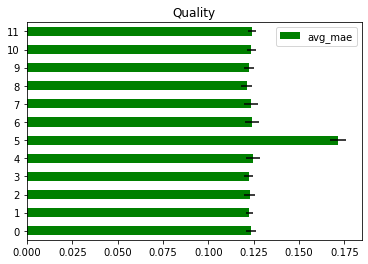

In [18]:
df_total_result_agg.plot(kind = "barh", y = "avg_mae", legend = True, xerr = "std_mae", title = "Quality", color='green')